# Base de dados de aeronaves

#### Base contém informação relativa à aeronaves envolvidas nas ocorrências

## Importando pacotes e bases de dados

In [12]:
#Importando pacotes
import numpy as np# Base de dados de recomendações#### Base consiste nas recomendações para evitar novas ocorrências
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [31]:
#verificando o tipo de encoding
import chardet
with open("aeronave.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [32]:
#Importando a base de dados
df_aeronave = pd.read_csv("aeronave.csv", sep = ';', encoding='ISO-8859-1')
#Importando a base de dados
df_ocorrencia = pd.read_csv("ocorrencia_pos.csv", sep = ',')
df_ocorrencia_fator = pd.read_csv("ocorrencia_fator.csv", sep = ',')

In [33]:
#removendo atributos não importantes
df_aeronave = df_aeronave.drop(['aeronave_matricula'],axis=1) 
df_aeronave = df_aeronave.drop(['aeronave_registro_categoria'],axis=1) 
df_aeronave = df_aeronave.drop(['aeronave_pmd','aeronave_pmd_categoria'],axis=1) 

## Exploração inicial da base

In [34]:
df_aeronave

,codigo_ocorrencia2,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979.0,BRASIL,BRASIL,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,8.0,1979.0,BRASIL,BRASIL,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,73.0,2008.0,BRASIL,BRASIL,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,5.0,1984.0,BRASIL,BRASIL,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001.0,BRASIL,BRASIL,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,79117,***,***,FABRICANTE DESCONHECIDO,MODELO DESCONHECIDO,***,***,***,NaN,NaN,BRASIL,BRASIL,***,PISTA DE POUSO EVENTUAL,PISTA DE POUSO EVENTUAL,***,***,DESTRUÍDA,2
5303,79119,***,***,FABRICANTE DESCONHECIDO,MODELO DESCONHECIDO,***,***,***,NaN,NaN,BRASIL,BRASIL,***,PISTA DE POUSO EVENTUAL,PISTA DE POUSO EVENTUAL,***,***,DESTRUÍDA,0
5304,79123,PARTICULAR,TRIKE,***,***,***,***,SEM TRAÇÃO,0.0,0.0,BRASIL,BRASIL,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,1
5305,79203,***,AVIÃO,CESSNA AIRCRAFT,152,C152,PISTÃO,MONOMOTOR,2.0,1980.0,BRASIL,BRASIL,INSTRUÇÃO,DIOMÍCIO FREITAS,HERCÍLIO LUZ,CORRIDA APÓS POUSO,INSTRUÇÃO,LEVE,0


In [35]:
print(df_aeronave['aeronave_fabricante'].unique())
print(len(df_aeronave['aeronave_fabricante'].unique()))

['NEIVA INDUSTRIA AERONAUTICA' 'BEECH AIRCRAFT' 'AEROSPATIALE AND ALENIA'
 'BOEING COMPANY' 'AIRBUS INDUSTRIE' 'CESSNA AIRCRAFT' 'EUROCOPTER FRANCE'
 '***' 'HELIBRAS' 'AERO BOERO' 'EMBRAER' 'ROBINSON HELICOPTER'
 'PIPER AIRCRAFT' 'ANTONIO CESAR DA SILVA AMARAL' 'HAWKER BEECHCRAFT'
 'PILATUS' 'CIRRUS DESIGN' 'AEROMOT' 'FOKKER' 'LEARJET' 'BELL HELICOPTER'
 'XAVANTE' 'DASSAULT AVIATION' 'MCDONNELL DOUGLAS' 'SIKORSKY AIRCRAFT'
 'NILSON SULZBACH PERES' 'EDSON PIMENTEL MATHEUS'
 'CIA AERONAUTICA PAULISTA' 'BRITTEN-NORMAN' 'AIR TRACTOR'
 'CHS AMAZONAS IMP E EXP LTDA' 'AGUSTA' 'LET AIRCRAFT INDUSTRIES'
 'FABRICACAO PROPRIA' 'NORTH AMERICAN'
 'INPAER INDUSTRIA PAULISTA E AERONÁUTICA' 'CHINCUL SACAIFI'
 'AIRCRAFT INDUSTRIES' 'RAYTHEON AIRCRAFT'
 'FLYER INDUSTRIA AERONAUTICA LTDA' 'TERRA AMBIENTAL E INCORPORADORA LTDA'
 'MITSUBISHI' 'TWIN COMMANDER' 'AMERICAN CHAMPION' 'LAKE AIRCRAFT'
 'AEROBRAVO LTDA' 'HUGHES HELICOPTER' 'HENRIQUE HAMILTON CERQUEIRA SANTOS'
 'INDÚSTRIA PARANAENSE DE ESTRUTURAS'


In [36]:
print(df_aeronave['aeronave_modelo'].unique())
print(len(df_aeronave['aeronave_modelo'].unique()))

['EMB-711A' 'C90' 'ATR-72-212A' '757-225' 'A320-232' 'A188B' 'AS 350 BA'
 'RV-9' 'HB-350B' 'AB-115' 'EMB-110' 'EMB-810C' '210N' 'R44'
 'MISTRAL 582C' 'EMB-711C' 'ATR-42-300' 'EMB-202' 'F33A' 'EMB-202A'
 'A320-214' 'PA-31T1' 'LANCAIR SUPER E' 'EMB-110P1' 'EMB-820C NAVAJO'
 'B200GT' 'PC-12/47' 'EMB-201' '150E' 'EMB-712' 'AS 350 B2' 'SR22'
 'A321-231' 'AMT-600' 'F28MK0100' '208B' '35A' '550' '310R' '206B'
 '737-7EH' 'EMB-711ST' '170A' '152' 'EMB-500' '150J' 'AS 350 B3' '210H'
 'E55' '210L' 'EMB-720C' 'PA-34-220T' '185' 'A-122-B' 'A36' 'FALCON 10'
 'DC-10-30F' 'EMB-810D' '182P' 'S-76C' 'BUMERANGUE EX27' '210K' '58'
 'ATR-42-500' 'ATR-42-320' 'PA-34-200' 'KIT FOX' 'MAX M22' '560XL' 'PA-31'
 'CAP-4' 'PC-12/45' '737-8EH' 'ERJ 170-200 LR' '182G' 'A320-233' 'FK9 MK3'
 'PA-28R-200' 'EMB-120ER' '172C' 'PA-31T' 'T206H' 'EMB-201A' '208'
 '767-201' 'FALCON 900EX (EASY)' 'BN-2A-9' 'A319-132' 'FALCAO AG-21'
 'R44 II' 'ERJ 190-200 IGW' 'B60' 'AT-802' '172F' 'EMB-720D' 'AS 365 N3'
 'S-76A' 'C90A' 'ATR-7

In [37]:
df_aeronave['aeronave_tipo_icao'].unique()

array(['P28R', 'BE9L', 'AT72', 'B752', 'A320', 'C188', '***', 'ULAC',
       'AS50', 'AB11', 'E110', 'PA34', 'C210', 'R44', 'AT43', 'IPAN',
       'BE33', 'PAY1', 'ZZZZ', 'PA31', 'BE20', 'PC12', 'C150', 'P28A',
       'SR22', 'A321', 'GURI', 'F100', 'C208', 'LJ35', 'C550', 'C310',
       'B06', 'B737', 'P28T', 'C170', 'C152', 'E50P', 'BE55', 'PA32',
       'C185', 'A122', 'BE36', 'FA10', 'DC10', 'C182', 'S76', 'BE58',
       'AT45', 'C56X', 'PAUL', 'B738', 'E170', 'E120', 'C172', 'PAY2',
       'C206', 'F900', 'BN2P', 'A319', 'E190', 'BE60', 'AT8T', 'AS65',
       'B722', 'LJ60', 'PRM1', 'A109', 'L410', 'B212', 'R22', 'C510',
       'E121', 'B733', 'C560', 'LJ31', 'E145', 'BE30', 'B407', 'PA46',
       'PAT4', 'C180', 'S61', 'T6', 'LJ55', 'EC55', 'C525', 'PA23',
       'B350', 'BE10', 'BE40', 'LJ45', 'PA27', 'B77W', 'C500', 'C207',
       'C82R', 'H25B', 'MU2', 'P32R', 'RF10', 'AB18', 'AC90', 'PA25',
       'O1', 'A332', 'PA18', 'AC50', 'BL8', 'SR20', 'P28B', 'PA30',
       'C402', 'LA

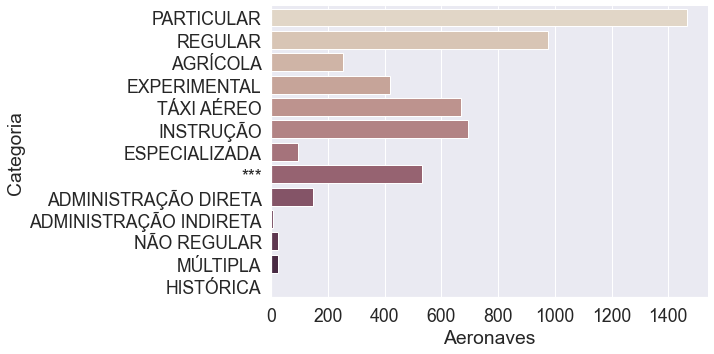

In [38]:
#Distribuição da categoria de operador da aeronave
sns.set(font_scale = 1.6)
sns_plot = sns.catplot(y='aeronave_operador_categoria', kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Categoria")
sns_plot.savefig("aeronave_operador_categoria.png")

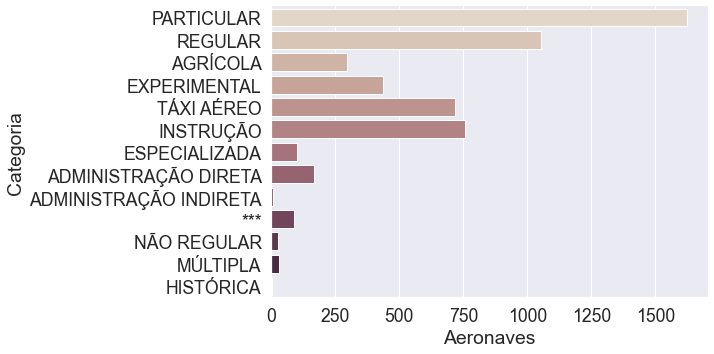

In [39]:
#Distribuição do registro do segmento
sns.set(font_scale = 1.6)
sns_plot = sns.catplot(y='aeronave_registro_segmento', kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Categoria")
sns_plot.savefig("aeronave_registro_segmento.png")

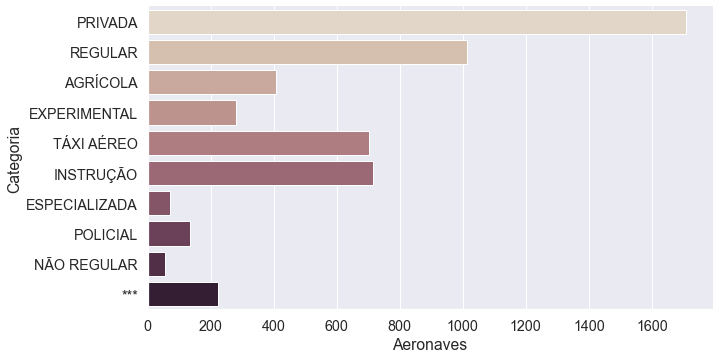

In [40]:
#Distribuição do tipo de operação
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_tipo_operacao', kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Categoria")
sns_plot.savefig("aeronave_tipo_operacao.png")

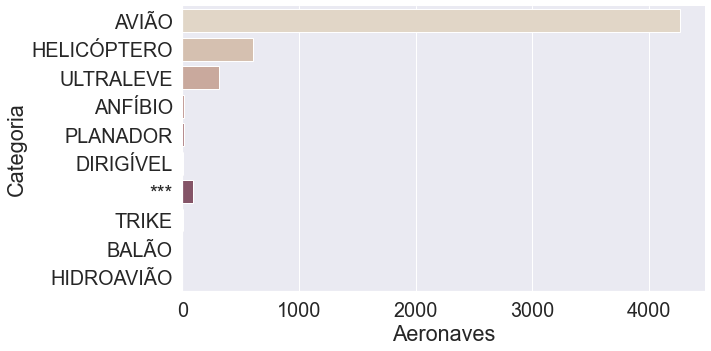

In [41]:
#Distribuição do tipo de veículo
sns.set(font_scale = 1.8)
sns_plot = sns.catplot(y='aeronave_tipo_veiculo', kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Categoria")
sns_plot.savefig("aeronave_tipo_veiculo.png")

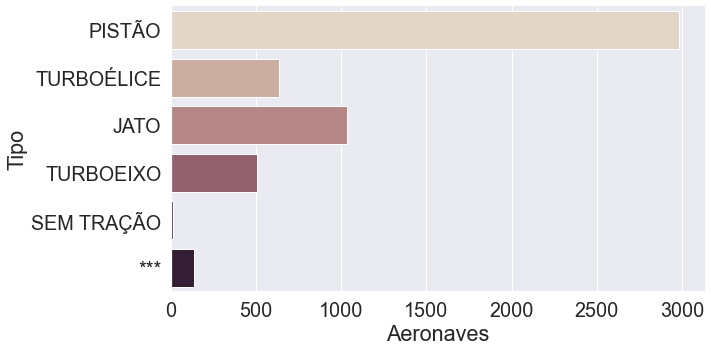

In [42]:
#Distribuição do tipo de motor
sns.set(font_scale = 1.8)
sns_plot = sns.catplot(y='aeronave_motor_tipo', kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Tipo")
sns_plot.savefig("aeronave_motor_tipo.png")

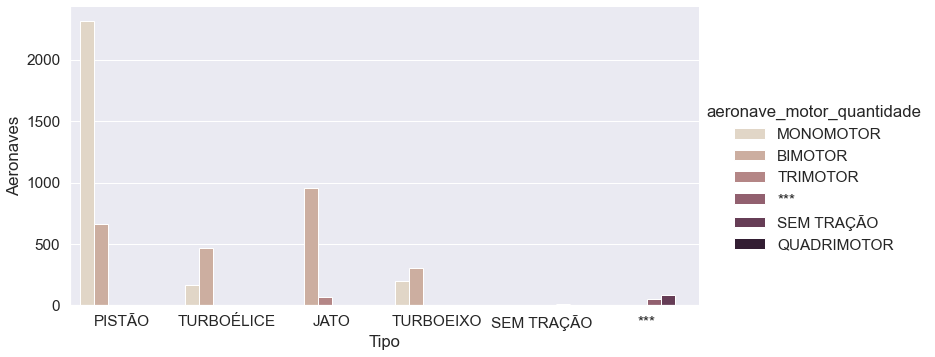

In [49]:
#Distribuição do tipo de motor considerando quantidade
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x='aeronave_motor_tipo', hue = 'aeronave_motor_quantidade',kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Tipo","Aeronaves")
sns_plot.savefig("aeronave_motor_quantidade_tipo.png")

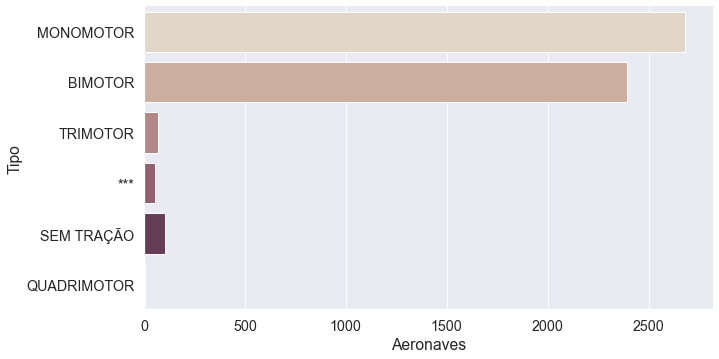

In [44]:
#Distribuição da quantidade de motores
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_motor_quantidade',kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Tipo")
sns_plot.savefig("aeronave_motor_quantidade.png")

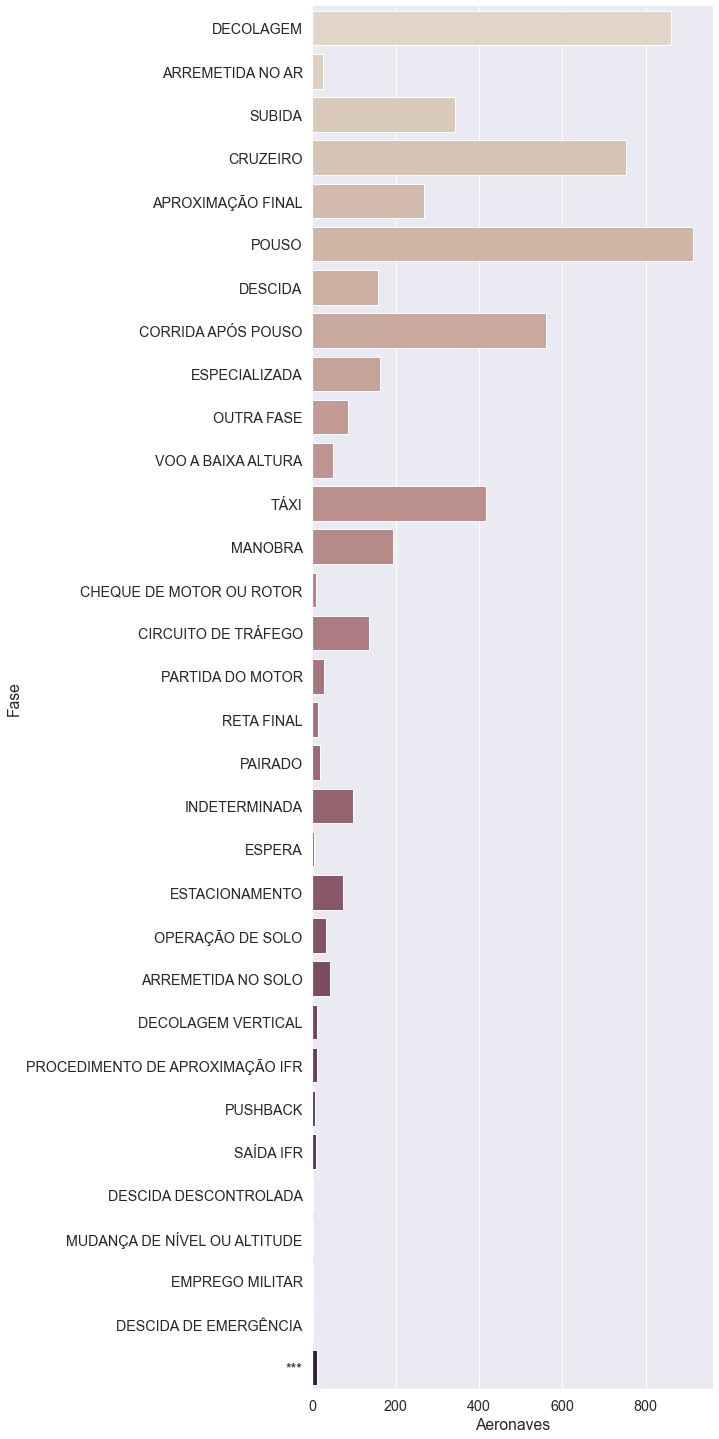

In [45]:
#Distribuição da fase de operação
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_fase_operacao',kind="count", palette="ch:.25", data=df_aeronave, height = 20, aspect=0.5)
sns_plot.set_axis_labels("Aeronaves","Fase")
sns_plot.savefig("aeronave_fase_operacao.png")

In [46]:
#agrupando por fase de operação e selecionando as 10 mais frequentes
fase_operacao = df_aeronave.groupby(['aeronave_fase_operacao']).count().sort_values('codigo_ocorrencia2',ascending=False)[:10].reset_index()

In [47]:
fase_operacao

,aeronave_fase_operacao,codigo_ocorrencia2,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,POUSO,915,915,915,915,915,915,915,915,901,901,915,915,915,915,915,915,915,915
1,DECOLAGEM,860,860,860,860,860,860,860,860,838,840,860,860,860,860,860,860,860,860
2,CRUZEIRO,753,753,753,753,753,753,753,753,726,732,753,753,753,753,753,753,753,753
3,CORRIDA APÓS POUSO,561,561,561,561,561,561,561,561,548,545,561,561,561,561,561,561,561,561
4,TÁXI,417,417,417,417,417,417,417,417,410,411,417,417,417,417,417,417,417,417
5,SUBIDA,343,343,343,343,343,343,343,343,335,336,343,343,343,343,343,343,343,343
6,APROXIMAÇÃO FINAL,269,269,269,269,269,269,269,269,265,264,269,269,269,269,269,269,269,269
7,MANOBRA,195,195,195,195,195,195,195,195,189,189,195,195,195,195,195,195,195,195
8,ESPECIALIZADA,162,162,162,162,162,162,162,162,158,159,162,162,162,162,162,162,162,162
9,DESCIDA,158,158,158,158,158,158,158,158,155,155,158,158,158,158,158,158,158,158


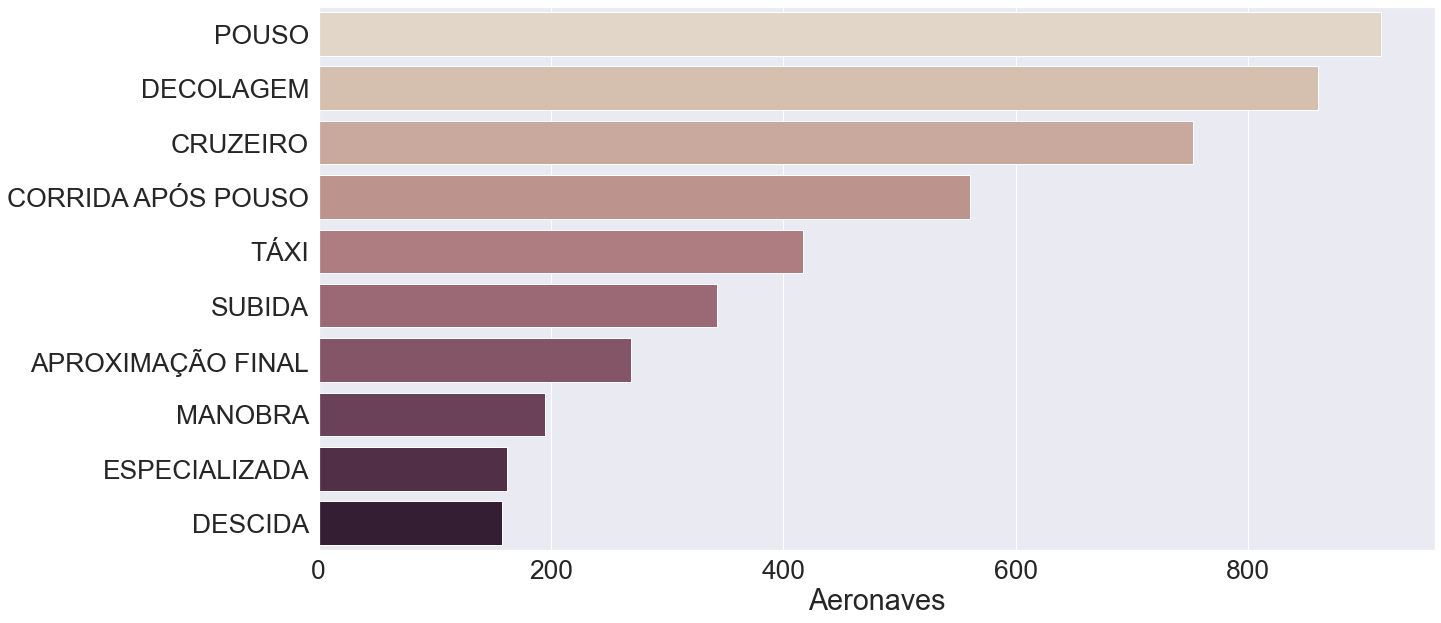

In [48]:
##Distribuição da fase de operação considerando apenas as 10 mais frequentes
sns.set(font_scale = 2.4)
sns_plot = sns.barplot(x="codigo_ocorrencia2", y="aeronave_fase_operacao", data=fase_operacao, palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_ylabel("")
sns_plot.set_xlabel("Aeronaves")
sns_plot.figure.savefig("fase_operacao_10.png", bbox_inches = 'tight')

In [54]:
#considerando apenas as aeronaves que contem as 10 fases mais frequentes 
df_aeronave['aeronave_fase_operacao'] = df_aeronave['aeronave_fase_operacao'].apply(lambda x: x if x in fase_operacao['aeronave_fase_operacao'].unique() else np.nan)
df_aeronave = df_aeronave.dropna()

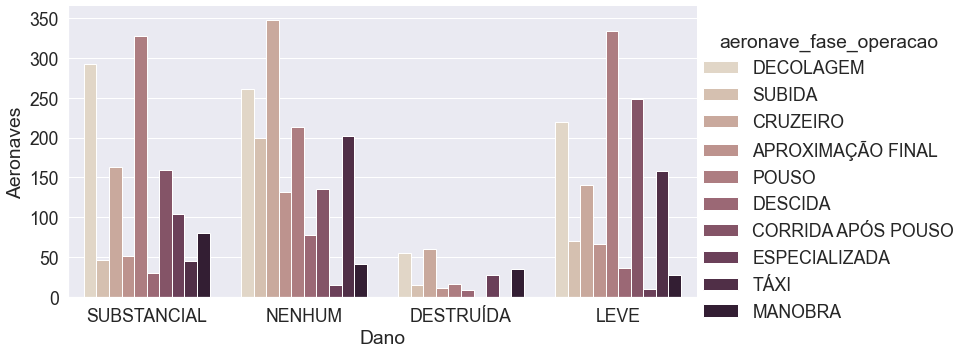

In [58]:
#Distribuição de nivel de dano considerando a fase de operação
sns.set(font_scale = 1.6)
sns_plot = sns.catplot(x='aeronave_nivel_dano',kind="count",hue = "aeronave_fase_operacao", palette="ch:.25", data=df_aeronave[df_aeronave['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Dano","Aeronaves")
sns_plot.savefig("aeronave_nivel_dano_fase.png")

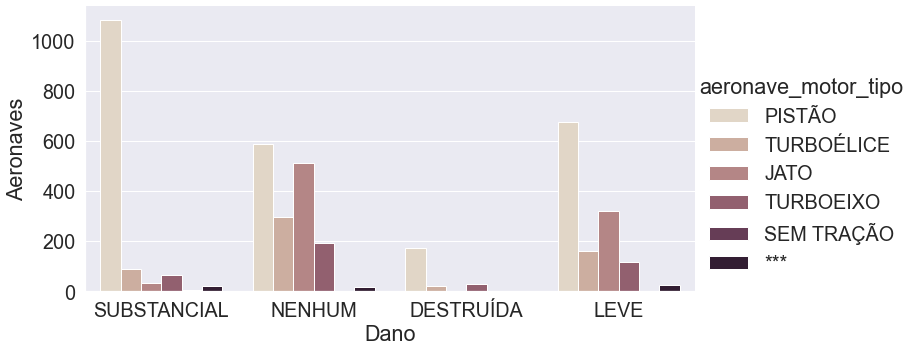

In [88]:
#Distribuição de nivel de dano considerando o tipo de motor
sns.set(font_scale = 1.8)
sns_plot = sns.catplot(x='aeronave_nivel_dano',kind="count",hue = 'aeronave_motor_tipo', palette="ch:.25", data=df_aeronave[df_aeronave['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Dano","Aeronaves")
sns_plot.savefig("aeronave_nivel_dano_motor_tipo.png")

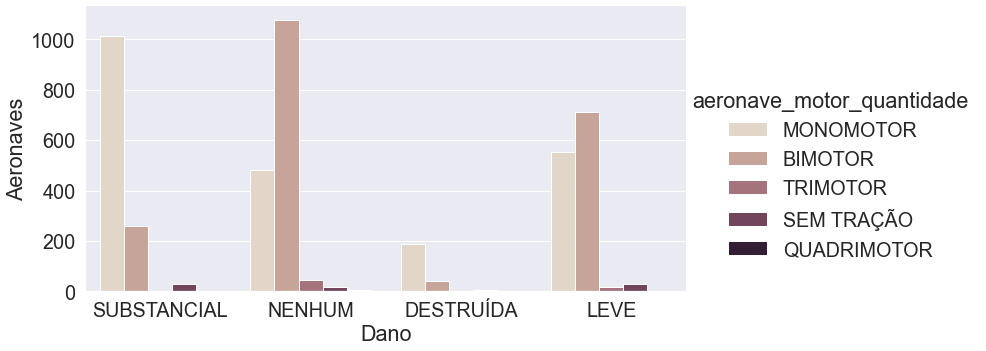

In [61]:
#Distribuição de nivel de dano considerando a quantidade de motores
sns.set(font_scale = 1.8)
sns_plot = sns.catplot(x='aeronave_nivel_dano',kind="count",hue = 'aeronave_motor_quantidade', palette="ch:.25", data=df_aeronave[df_aeronave['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Dano","Aeronaves")
sns_plot.savefig("aeronave_nivel_dano_motor_quantidade.png")

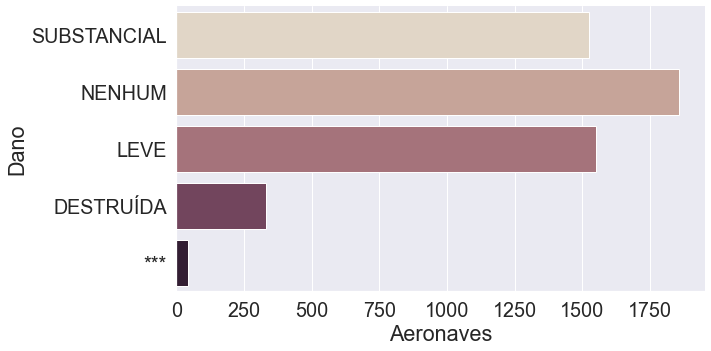

In [51]:
#Distribuição de nivel de dano
sns.set(font_scale = 1.8)
sns_plot = sns.catplot(y='aeronave_nivel_dano',kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Aeronaves","Dano")
sns_plot.savefig("aeronave_nivel_dano.png", bbox_inches = 'tight')

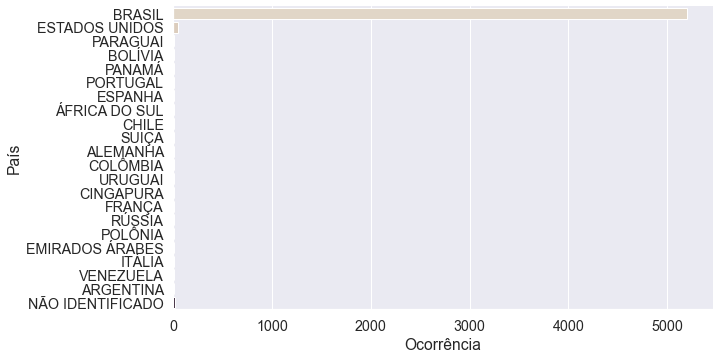

In [1055]:
#Distribuição de países fabricantes
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_pais_fabricante',kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Ocorrência","País")
sns_plot.savefig("aeronave_pais_fabricante.png")

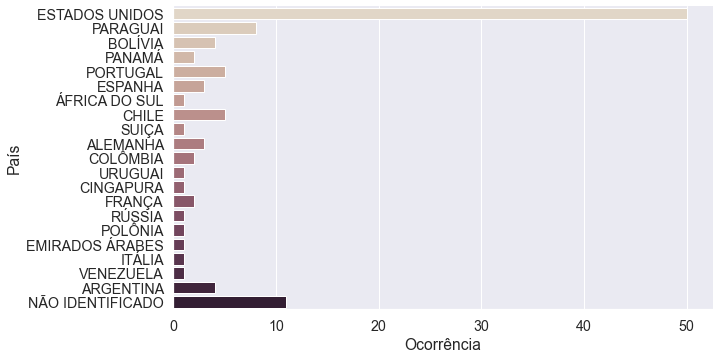

In [1087]:
#Distribuição de países fabricantes desconsiderando o Brasil
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_pais_fabricante',kind="count", palette="ch:.25", data=df_aeronave[df_aeronave['aeronave_pais_fabricante']!='BRASIL'], aspect=2)
sns_plot.set_axis_labels("Ocorrência","País")
sns_plot.savefig("aeronave_pais_fabricante_sem_brasil.png")

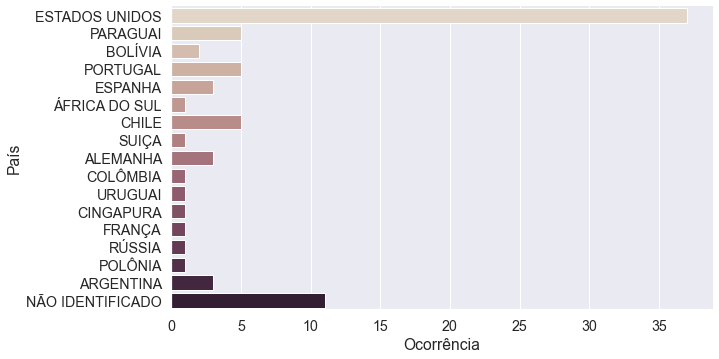

In [64]:
#Distribuição de países onde aeronave foi registrada desconsiderando o Brasil
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_pais_registro',kind="count", palette="ch:.25", data=df_aeronave[df_aeronave['aeronave_pais_registro']!='BRASIL'], aspect=2)
sns_plot.set_axis_labels("Ocorrência","País")
sns_plot.savefig("aeronave_pais_registro_sem_brasil.png")

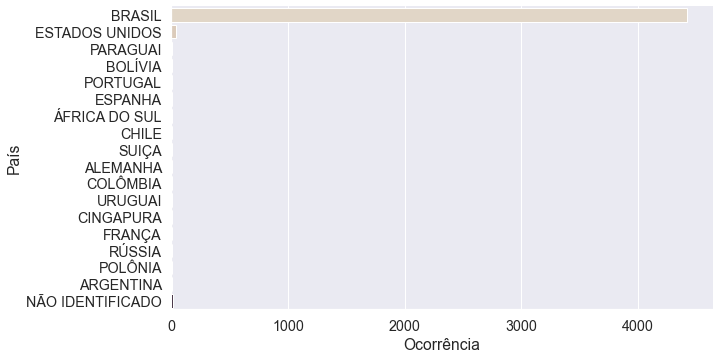

In [65]:
#Distribuição de países onde aeronave foi registrada considerando o Brasil
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='aeronave_pais_registro',kind="count", palette="ch:.25", data=df_aeronave, aspect=2)
sns_plot.set_axis_labels("Ocorrência","País")
sns_plot.savefig("aeronave_pais_registro.png")

## Anélise dos atributos numéricos

In [66]:
df_aeronave["aeronave_assentos"].describe()

count    4502.000000
mean       28.084407
std        54.235258
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max       384.000000
Name: aeronave_assentos, dtype: float64

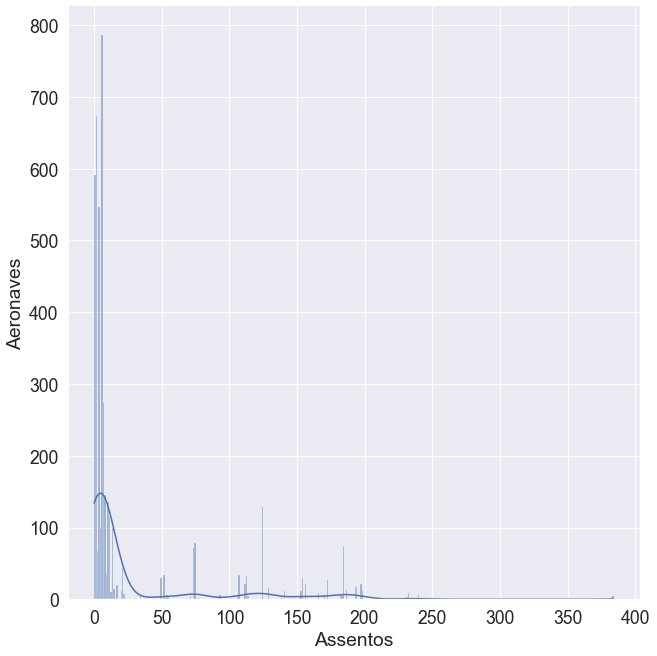

In [67]:
#Distribuição de assentos
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x="aeronave_assentos", kde=True, height=9.5, aspect=1.)
sns_plot.set_axis_labels("Assentos", "Aeronaves")
#sns_plot.set(xlim=)
sns_plot.savefig("aeronave_assentos.png")

In [89]:
#Filtrando anos de fabricação acima de 2019 e abaixo de 1900
df_aeronave['aeronave_ano_fabricacao'] = df_aeronave['aeronave_ano_fabricacao'].apply(lambda x: x if x < 2019 and x > 1900 else np.nan)

In [90]:
df_aeronave['aeronave_ano_fabricacao'].describe()

count    4279.000000
mean     1992.962608
std        15.380175
min      1936.000000
25%      1980.000000
50%      1994.000000
75%      2008.000000
max      2018.000000
Name: aeronave_ano_fabricacao, dtype: float64

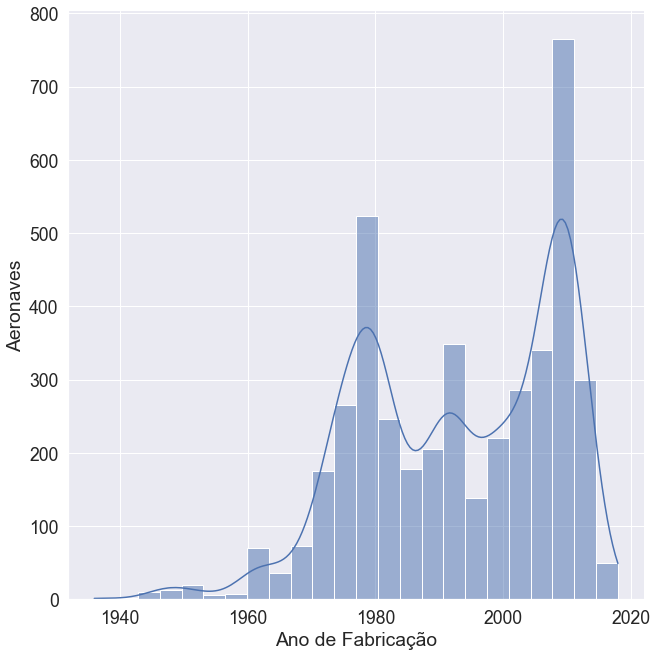

In [91]:
#Distribuição de ano de fabricação
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x="aeronave_ano_fabricacao", kde=True, height=9.5, aspect=1.)
sns_plot.set_axis_labels("Ano de Fabricação", "Aeronaves")
#sns_plot.set(xlim=)
sns_plot.savefig("aeronave_ano_fabricacao.png")

In [71]:
df_aeronave['aeronave_fatalidades_total'].describe()

count    4502.000000
mean        0.140382
std         0.695509
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: aeronave_fatalidades_total, dtype: float64

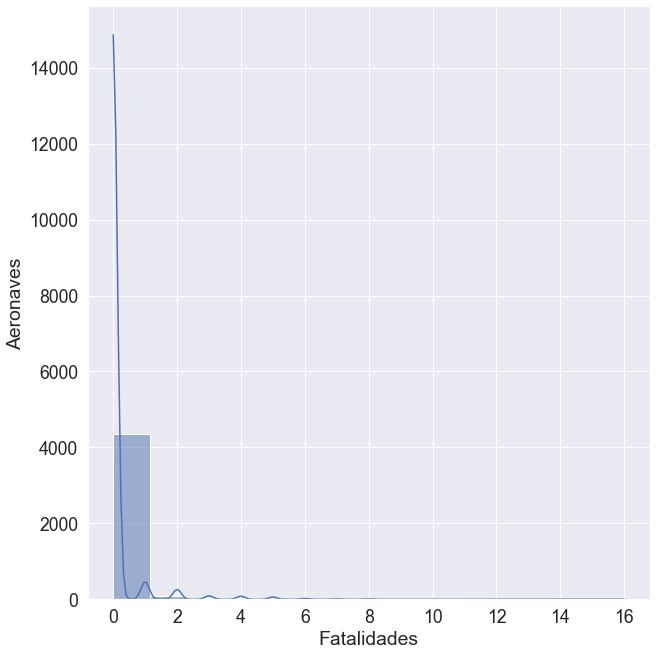

In [72]:
#Distribuição de fatalidades
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x='aeronave_fatalidades_total', kde=True, height=9.5, aspect=1.)
sns_plot.set_axis_labels("Fatalidades", "Aeronaves")
#sns_plot.set(xlim=)
sns_plot.savefig("aeronave_fatalidades_total.png")

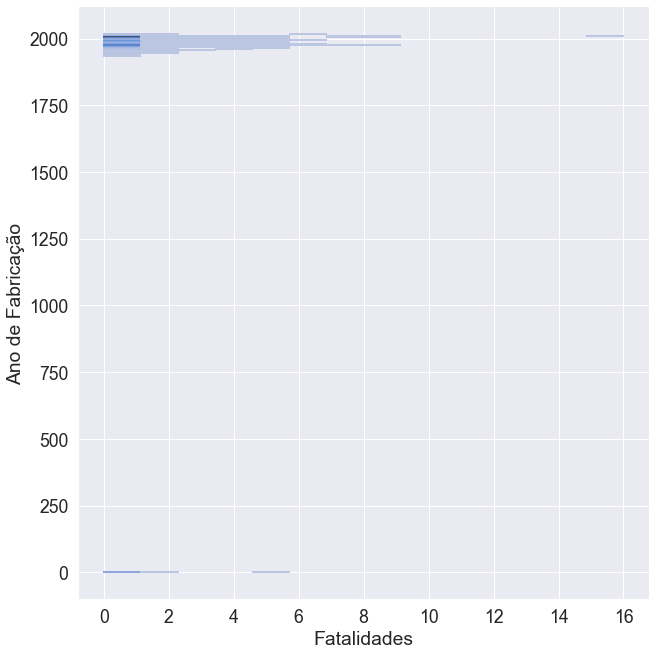

In [63]:
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x='aeronave_fatalidades_total',y = "aeronave_ano_fabricacao", height=9.5, aspect=1.)
sns_plot.set_axis_labels("Fatalidades", "Ano de Fabricação")
#sns_plot.set(xlim=)
sns_plot.savefig("fatalidade_ano.png")

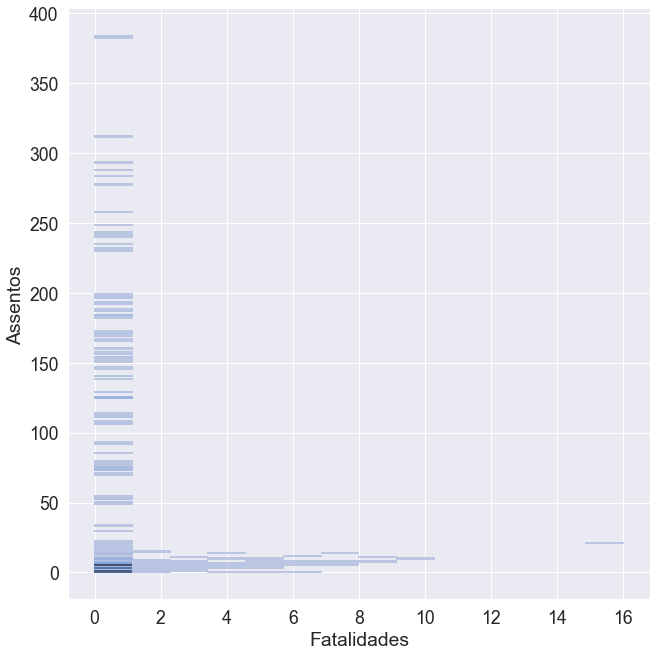

In [1095]:
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x='aeronave_fatalidades_total',y = "aeronave_assentos", height=9.5, aspect=1.)
sns_plot.set_axis_labels("Fatalidades", "Assentos")
#sns_plot.set(xlim=)
sns_plot.savefig("fatalidade_assentos.png")

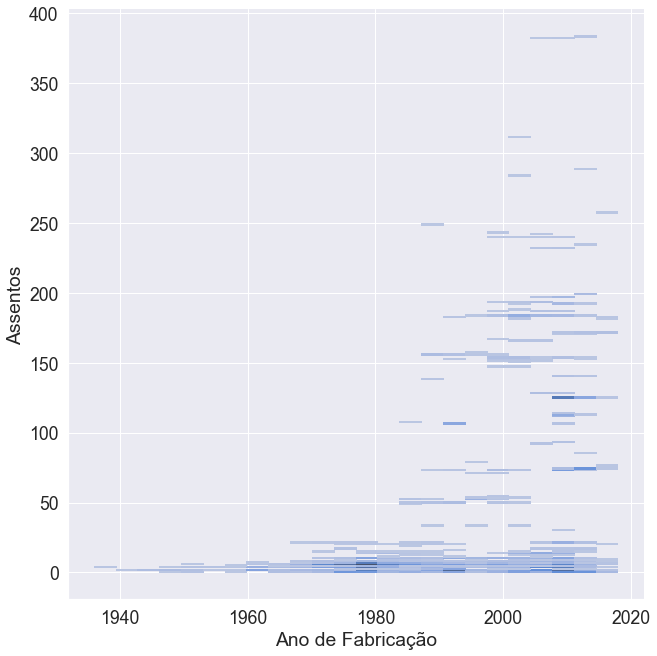

In [73]:
sns.set(font_scale = 1.6)
sns_plot = sns.displot(data=df_aeronave, x='aeronave_ano_fabricacao',y = "aeronave_assentos", height=9.5, aspect=1.)
sns_plot.set_axis_labels("Ano de Fabricação", "Assentos")
#sns_plot.set(xlim=)
sns_plot.savefig("ano_assentos.png")

## Análise unindo a tabela com ocorrências com a tabela de aeronaves

In [74]:
df_aeronave=df_aeronave.drop_duplicates('codigo_ocorrencia2')

In [75]:
df_oco_aeronave = df_ocorrencia.merge(df_aeronave)

In [76]:
df_oco_fator_av = df_ocorrencia_fator.merge(df_aeronave)

In [1144]:
df_oco_fator_av.columns

Index(['Unnamed: 0', 'codigo_ocorrencia', 'codigo_ocorrencia1',
       'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4',
       'ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ano', 'fator_nome', 'total_fatores',
       'fator_humano', 'fator_operacional', 'fator_material',
       'fator_metereologico', 'fator_outro', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       '

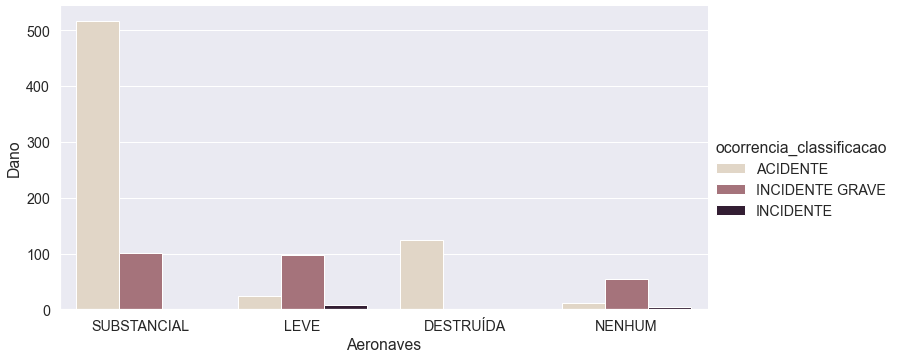

In [1163]:
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(x='aeronave_nivel_dano',kind="count",hue = 'ocorrencia_classificacao', palette="ch:.25", data=df_oco_fator_av[df_oco_fator_av['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Aeronaves","Dano")
sns_plot.savefig("aeronave_nivel_dano_ocorrencia_classificacao.png")

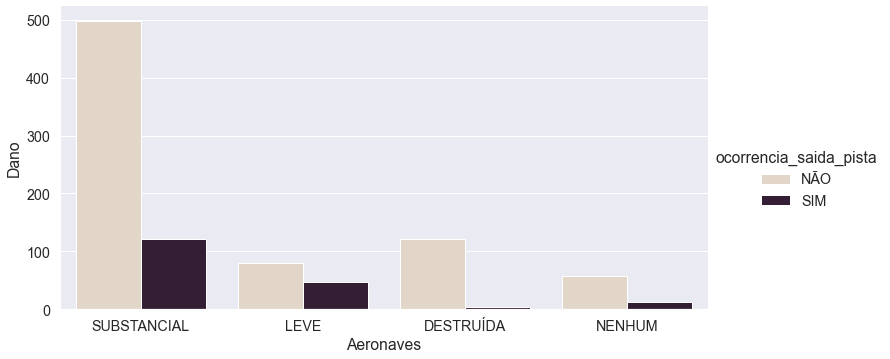

In [1164]:
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(x='aeronave_nivel_dano',kind="count",hue = 'ocorrencia_saida_pista', palette="ch:.25", data=df_oco_fator_av[df_oco_fator_av['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Aeronaves","Dano")
sns_plot.savefig("aeronave_nivel_dano_ocorrencia_saida_pista.png")

In [82]:
nivel_dano = df_oco_fator_av.groupby(['aeronave_nivel_dano']).sum().sort_values('codigo_ocorrencia2',ascending=False).reset_index()

In [83]:
nivel_dano

,aeronave_nivel_dano,Unnamed: 0,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,total_recomendacoes,total_aeronaves_envolvidas,ano,total_fatores,fator_humano,fator_operacional,fator_material,fator_metereologico,fator_outro,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
0,SUBSTANCIAL,272868,28211760,28211760,28211760,28211760,28211760,686,546,1095245,1876,487,1311,9,44,25,2519.0,1067051.0,63
1,LEVE,48889,5717344,5717344,5717344,5717344,5717344,200,113,227447,398,78,293,2,12,13,2018.0,220757.0,1
2,DESTRUÍDA,37081,4552054,4552054,4552054,4552054,4552054,220,94,187163,624,302,278,6,29,9,464.0,182964.0,237
3,NENHUM,27985,3182778,3182778,3182778,3182778,3182778,101,65,128817,205,67,125,4,6,3,1345.0,121086.0,0
4,***,1157,181171,181171,181171,181171,181171,0,4,8047,15,5,9,0,1,0,20.0,7960.0,4


<ipython-input-87-06fbe24474b6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = np.arange(0,1500,200),fontsize = fontsize)


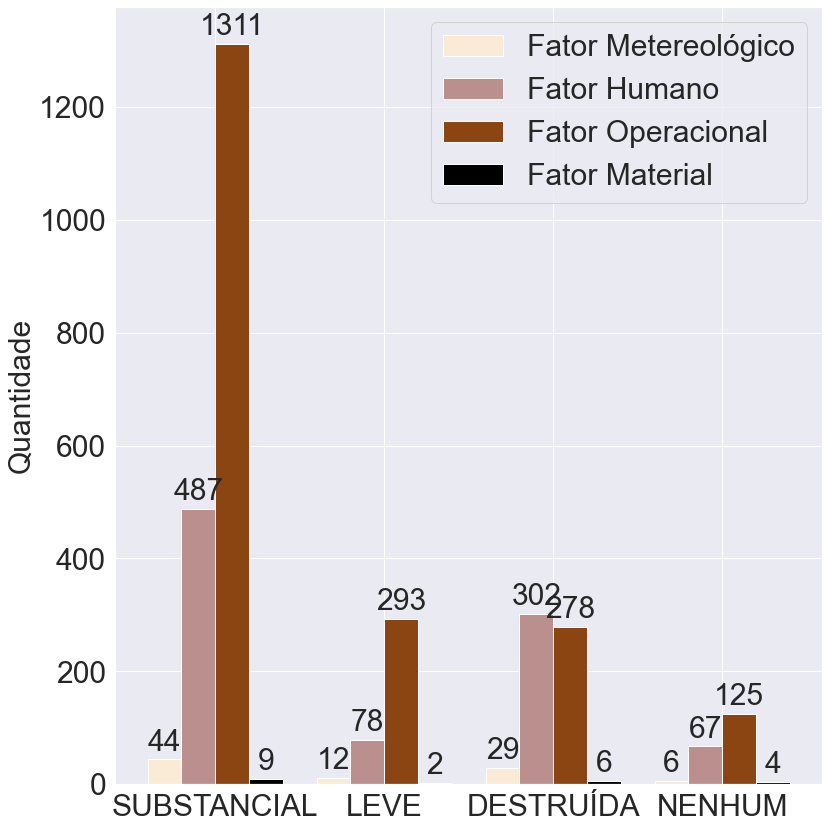

In [87]:
fontsize = 30
fig, ax = plt.subplots(figsize=(12,12))
labels = nivel_dano[nivel_dano["aeronave_nivel_dano"]!='***']["aeronave_nivel_dano"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
rects4 = ax.bar(x - 3*width/2, nivel_dano["fator_metereologico"][:-1], width, label='Fator Metereológico',color='antiquewhite')
rects1 = ax.bar(x - width/2, nivel_dano["fator_humano"][:-1], width, label='Fator Humano',color='rosybrown')
rects2 = ax.bar(x + width/2, nivel_dano["fator_operacional"][:-1], width, label='Fator Operacional',color='saddlebrown')
rects3 = ax.bar(x + 3*width/2, nivel_dano["fator_material"][:-1], width, label='Fator Material',color='black')

ax.set_ylabel('Quantidade',fontsize = fontsize)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize = fontsize)
ax.set_yticklabels(labels = np.arange(0,1500,200),fontsize = fontsize)
ax.legend(fontsize = fontsize)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = fontsize)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
fig.savefig(fname="dano_fatores.png")

In [34]:
nivel_dano[nivel_dano["aeronave_nivel_dano"]!='***']["aeronave_nivel_dano"]

0    SUBSTANCIAL
1           LEVE
2      DESTRUÍDA
3         NENHUM
Name: aeronave_nivel_dano, dtype: object

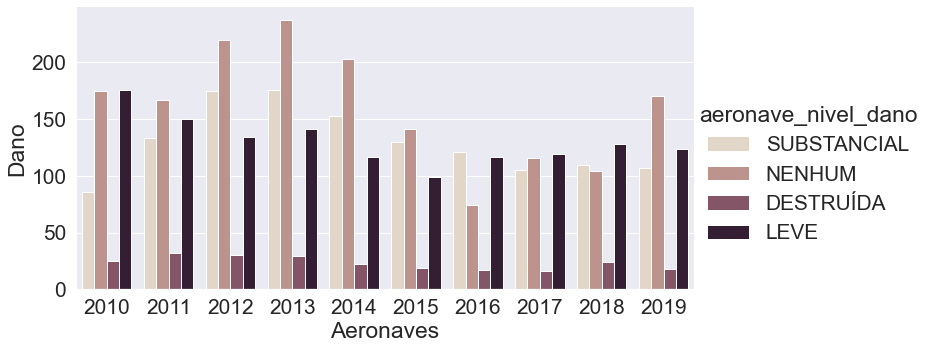

In [80]:
sns.set(font_scale = 1.9)
sns_plot = sns.catplot(x='ano',kind="count",hue = 'aeronave_nivel_dano', palette="ch:.25", data=df_oco_aeronave[df_oco_aeronave['aeronave_nivel_dano']!='***'], aspect=2)
sns_plot.set_axis_labels("Aeronaves","Dano")
sns_plot.savefig("aeronave_nivel_dano_ano.png")

## Exportando base de dado unida

In [9]:
df_oco_fator_av.to_csv('oco_fator_av.csv')